## Кластеризация результатов студенческой оценки преподавания и исследование зависимостей с другими данными

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import os
from google.colab import drive
 
drive.mount('/content/drive')
 
data_root = '/content/drive/MyDrive/Colab Notebooks/FirstPancake'
os.environ['DATA_ROOT'] = data_root
 
print('Data root:', data_root)
print('Data root contains:', os.listdir(data_root))

Mounted at /content/drive
Data root: /content/drive/MyDrive/Colab Notebooks/FirstPancake
Data root contains: ['gender_submission.csv', 'test.csv', 'train.csv', 'Titanic.csv', 'sklearn_boston.ipynb', 'telecom_churn.csv', 'telecom.ipynb', 'boston_dataset_scikit.ipynb', 'Titanic.ipynb', 'Остров.ipynb', 'turkiye-student-evaluation_generic.csv', 'Студенческая оценка преподавания.ipynb']


In [3]:
data = pd.read_csv(os.path.join(data_root, 'turkiye-student-evaluation_generic.csv'))
data.shape

(5820, 33)

In [ ]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.isna().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [ ]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


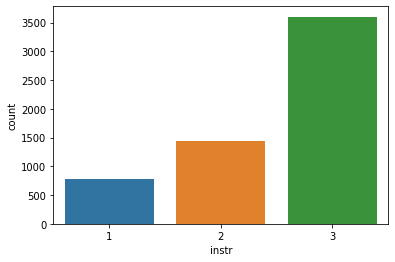

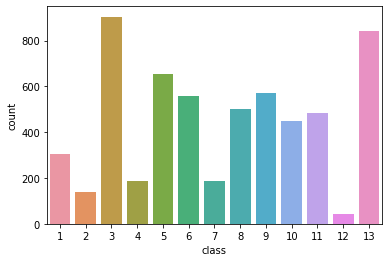

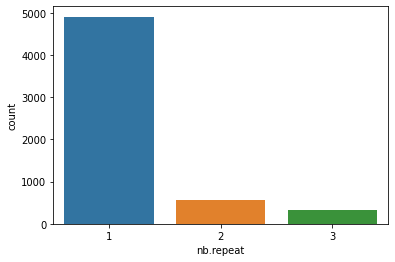

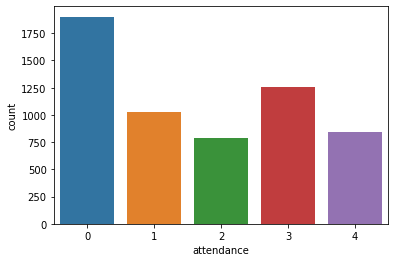

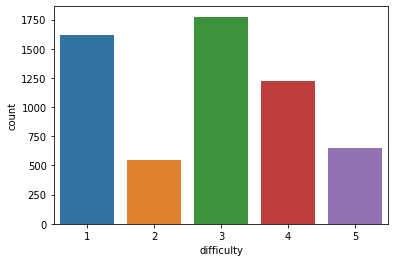

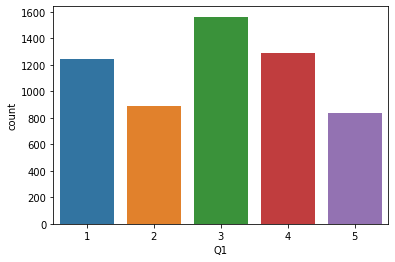

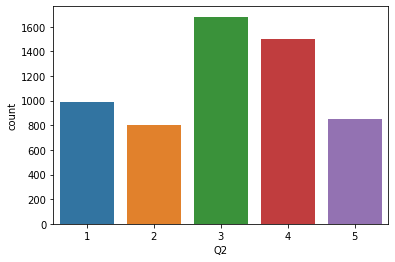

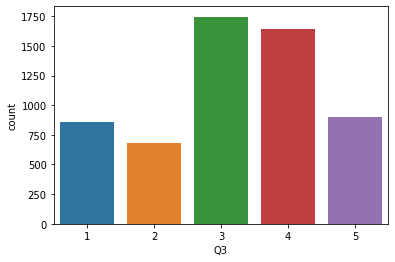

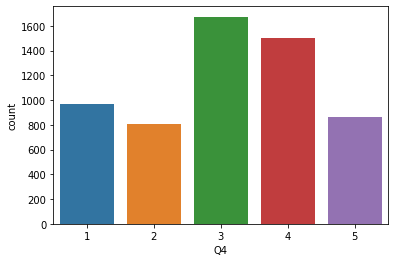

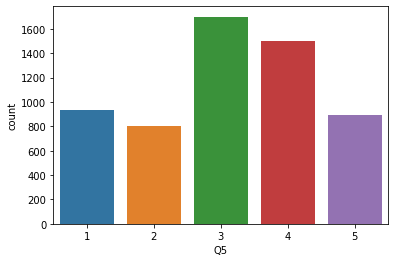

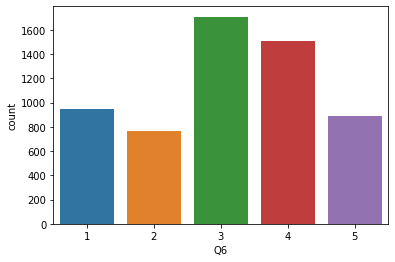

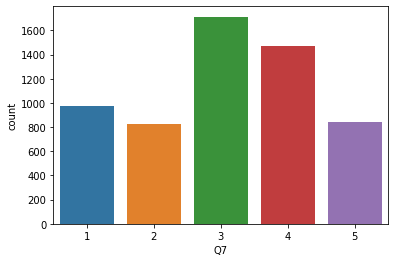

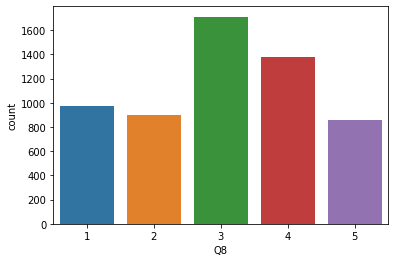

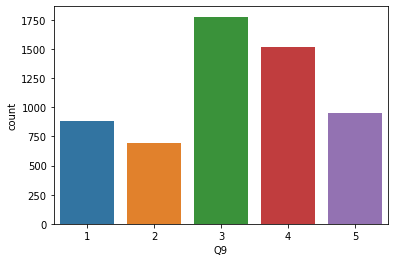

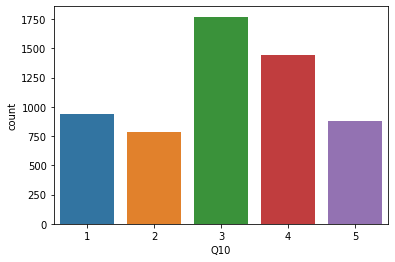

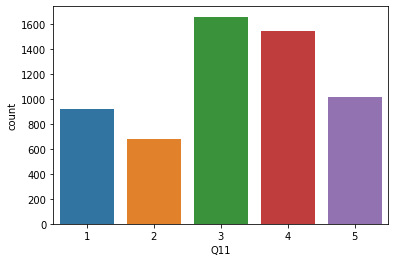

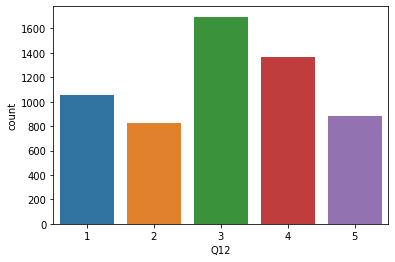

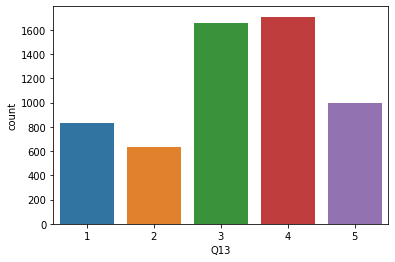

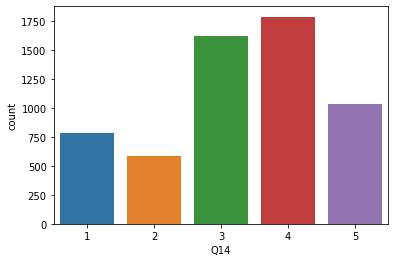

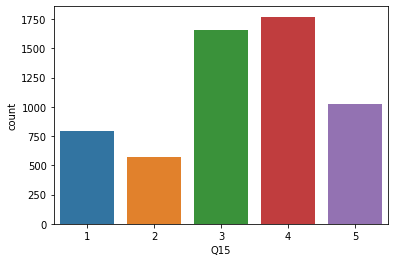

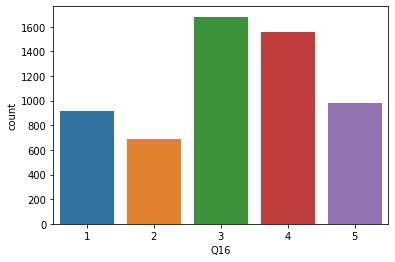

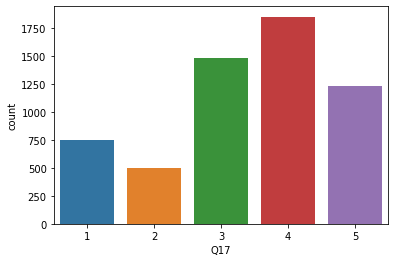

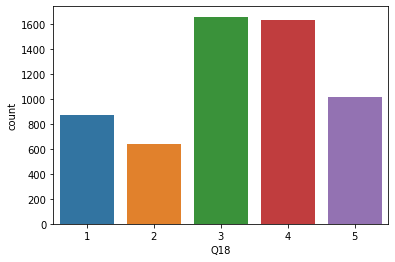

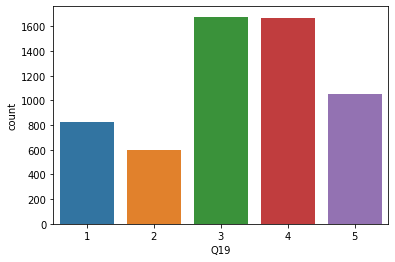

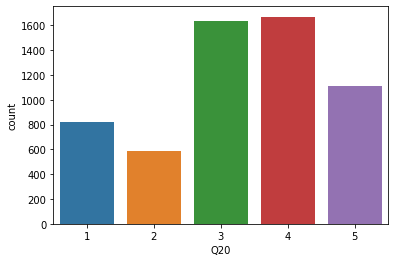

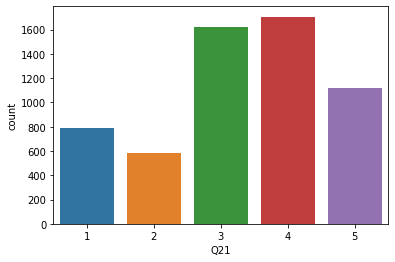

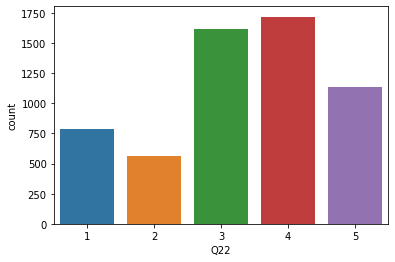

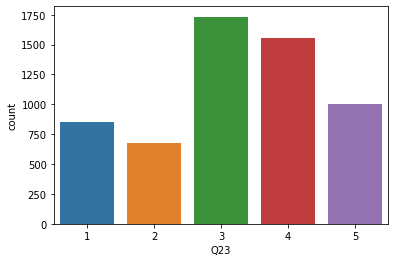

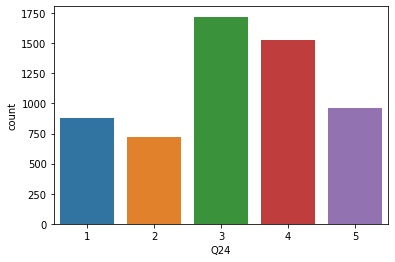

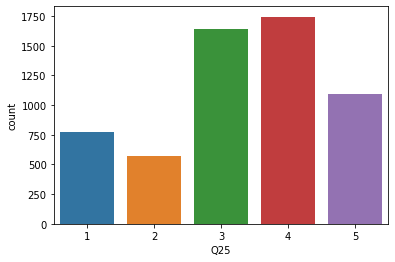

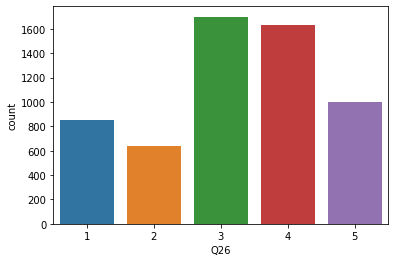

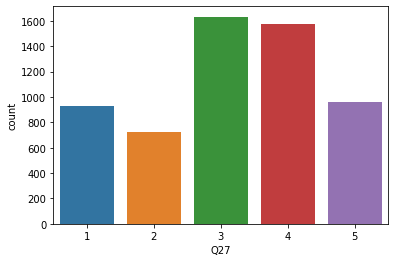

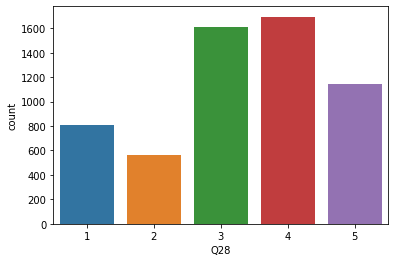

In [7]:
for i in data.columns:
    sns.countplot(x=i,data=data)
    plt.show()

In [ ]:
data.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [ ]:
mean = {'Q1':'mean', 'Q2':'mean', 'Q3':'mean', 'Q4':'mean', 'Q5':'mean', 'Q6':'mean', 'Q7':'mean', 'Q8':'mean',
     'Q9':'mean', 'Q10':'mean', 'Q11':'mean', 'Q12':'mean', 'Q13':'mean', 'Q14':'mean', 'Q15':'mean', 'Q16':'mean',
     'Q17':'mean', 'Q18':'mean', 'Q19':'mean', 'Q19':'mean', 'Q20':'mean', 'Q21':'mean', 'Q22':'mean', 'Q23':'mean',
     'Q24':'mean', 'Q25':'mean', 'Q26':'mean', 'Q27':'mean', 'Q28':'mean'}

In [ ]:
data_mean = data.groupby('class').agg(mean)

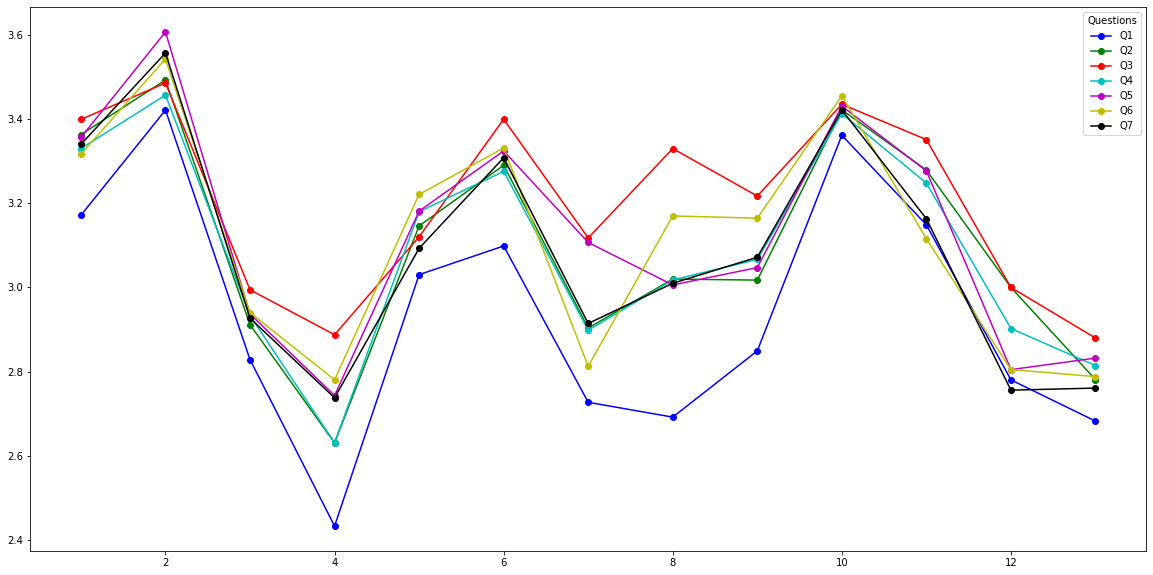

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(data_mean.index, data_mean.Q1, marker='o', color='b', label='Q1')
plt.plot(data_mean.index, data_mean.Q2, marker='o', color='g', label='Q2')
plt.plot(data_mean.index, data_mean.Q3, marker='o', color='r', label='Q3')
plt.plot(data_mean.index, data_mean.Q4, marker='o', color='c', label='Q4')
plt.plot(data_mean.index, data_mean.Q5, marker='o', color='m', label='Q5')
plt.plot(data_mean.index, data_mean.Q6, marker='o', color='y', label='Q6')
plt.plot(data_mean.index, data_mean.Q7, marker='o', color='k', label='Q7')
plt.legend(title='Questions')
plt.show()

In [ ]:
data_evaluation=data.drop(['instr','class','nb.repeat','attendance','difficulty'],1)
data_evaluation.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
data_pca=pca.fit_transform(data_evaluation)

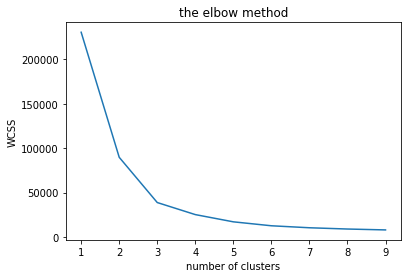

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_kmeans=kmeans.fit_predict(data_pca)

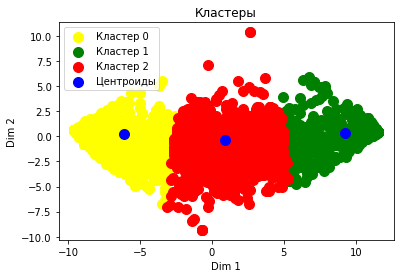

In [ ]:
plt.scatter(data_pca[y_kmeans==0,0],data_pca[y_kmeans==0,1],s=100,c='yellow',label='Кластер 0' )
plt.scatter(data_pca[y_kmeans==1,0],data_pca[y_kmeans==1,1],s=100,c='green',label='Кластер 1')
plt.scatter(data_pca[y_kmeans==2,0],data_pca[y_kmeans==2,1],s=100,c='red',label='Кластер 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='Центроиды')
plt.title('Кластеры')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend()
plt.show()

In [ ]:
labels = pd.DataFrame(y_kmeans , columns = ['label'])
labels['label'] = labels['label'].astype('category')

In [ ]:
labeled = data_evaluation.join(labels)

In [ ]:
labeled.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
labeled['label'] = labeled.label.apply(lambda x: 'Высокие оценки' if x==labeled['label'][2] 
                                 else 'Средние оценки' if x==labeled['label'][0] 
                                 else 'Низкие оценки' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


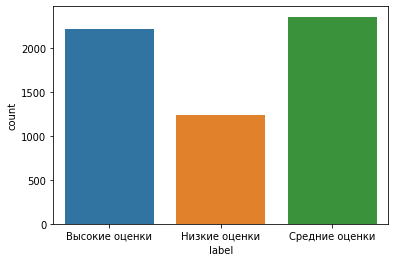

In [ ]:
sns.countplot(labeled.label)
plt.show()

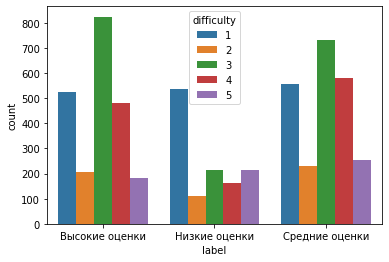

In [ ]:
data_labeled = data.join(labeled['label'])
sns.countplot(x= data_labeled.label,hue = data_labeled.difficulty)
plt.show()

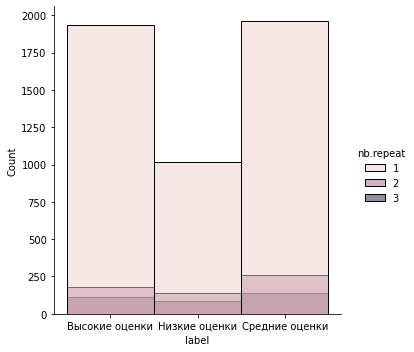

In [ ]:
sns.displot(x= data_labeled['label'], hue = data_labeled['nb.repeat'])
plt.show()

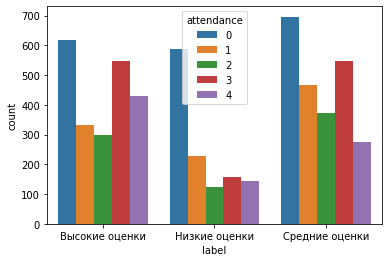

In [ ]:
sns.displot(x= data_labeled['label'], hue = data_labeled['attendance'])
plt.show()

## Предсказание того, что курс посещают не в первый раз

In [ ]:
X = labeled.drop('label', axis=1)
Y = data['nb.repeat']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, random_state=1)

rfc.fit(X_train,y_train)

y_pred_train = rfc.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, r2_score

print('Точность Random Forest: ', accuracy_score(y_pred,y_test))

Точность Random Forest:  0.8307560137457045


In [ ]:
from scipy.stats import zscore
X =X.apply(zscore)
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred_train = knn.predict(X_train)
y_prob_train = rfc.predict_proba(X_train)[:,1]

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]


print('Точность KNN: ', accuracy_score(y_pred,y_test))


Точность KNN:  0.834192439862543


In [ ]:
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()

regression.fit(X_train,y_train)

y_pred_train = regression.predict(X_train)
y_prob_train = regression.predict_proba(X_train)[:,1]

y_pred = regression.predict(X_test)
y_prob = regression.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score

print('Точность LogisticRegression: ', accuracy_score(y_pred,y_test))


Точность LogisticRegression:  0.8367697594501718
